In [2]:
%pip install opencv-python
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 3.0 MB/s eta 0:00:04
   - -------------------------------------- 0.5/11.0 MB 6.3 MB/s eta 0:00:02
   --- ------------------------------------ 0.8/11.0 MB 6.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.0 MB 8.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/11.0 MB 7.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.9/11.0 MB 7.5 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.0 MB 7.4 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/11.0 MB 7.1 MB/s eta 0:00:02
   ---------- ----------------------------- 2.8/11.0 MB 7.5 MB/s eta 0:00:02
   ----------- ---------------------------- 3.3/11.0 MB 8.0 MB/s eta 0:00:01
   ------------ ------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.cluster import KMeans

In [4]:
frame_path = "../output_video/cropped_frame.jpg"
frame = cv2.imread(frame_path)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

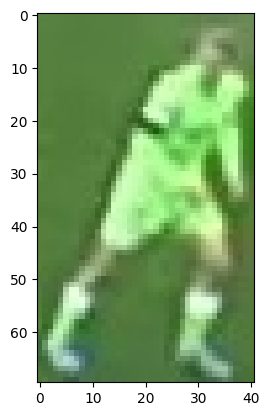

In [5]:
plt.imshow(frame)
plt.show()

# Take the top half of the frame

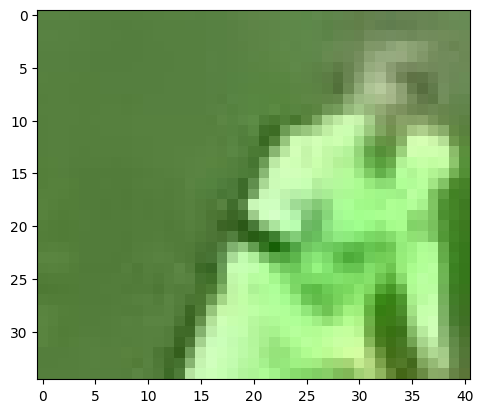

In [6]:
top_halfofframe = frame[0: int(frame.shape[0]/2), :]
plt.imshow(top_halfofframe)
plt.show()

# Cluster the frame into two clusters

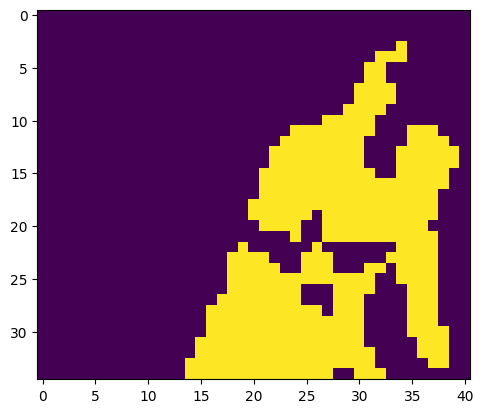

In [8]:
# Reshape the frame into 2D array
frame_2d = top_halfofframe.reshape(-1, 3)

# Perform KMeans Clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(frame_2d)# random state 0 to replicate the result

#get cluster label for each pixel whether it is belong to cluster one or cluster two
labels = kmeans.labels_

#reshape the labels into the original frame shape
clustered_frame = labels.reshape(top_halfofframe.shape[0], top_halfofframe.shape[1])

#display the clustered frame
plt.imshow(clustered_frame)
plt.show()

In [9]:
#get the class for the corner like if the class is 0 0 0  tghen class 0 is the background and class 1 is the foreground
corner_clusters = [clustered_frame[0, 0], clustered_frame[0, -1], clustered_frame[-1, 0], clustered_frame[-1, -1]]
non_palyercluster = max(set(corner_clusters), key=corner_clusters.count) #non_playercluster is the number which appeared most on those coerner
print(non_palyercluster)

0


In [10]:
playercluster = 1-non_palyercluster
print(playercluster)

1


In [11]:
#choose the color
kmeans.cluster_centers_[playercluster]

array([170.20854271, 234.31909548, 144.33165829])

In [ ]:
#clustering is working fine now put it into the module so that you can use to assign player team according to the t-shirt